### 数据清洗


In [3]:
#Python 3环境中安装了许多有用的分析库，在K-Lab中可以方便的调用
#例如，我们加载一下即将会用到的包 
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns  # visualization tool

In [7]:
data = pd.read_csv('D:/Users/wu.xl/PycharmProjects/data-analysis/data/Pokemon.csv', encoding='utf-8', encoding_errors='ignore')
# DataFrame开头的5行记录
data.head(5)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [8]:
data.tail(3)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True
799,721,Volcanion,Fire,Water,600,80,110,120,130,90,70,6,True


In [10]:
data.columns

Index(['#', 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')

In [11]:
data.shape

(800, 13)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


### EDA：探索性数据分析
value_counts(): pandas中的一个函数，可以对Series里面的每个值进行计数并且排序。

离群值（outliers）: 也称逸出值，是指在数据中有一个或几个数值与其他数值相比差异较大。

小于 Q1 - 1.5(Q3-Q1) ，或大于 Q3 + 1.5(Q3-Q1)的值称为outliers。  
TQR代表四分位数间距，IQR=(Q3-Q1)  
我们使用describe()函数总结数据集分布的中心趋势，常用的算术运算指标如下：

- count: 计算每个条目出现的次数
- mean: 平均值
- std: 标准差
- min: 最小值
- 25%: 第一四分位数
- 50%: 中位数
- 75%: 第三四分位数
- max: 最大值

什么是四分位数（quantile）?

四分位数也称四分位点，是指在统计学中把所有数值由小到大排列并分成四等份，处于三个分割点位置的数值。多应用于统计学中的箱线图绘制。它是一组数据排序后处于25%和75%位置上的值。
四分位数是通过3个点将全部数据等分为4部分，其中每部分包含25%的数据。很显然，中间的四分位数就是中位数，因此通常所说的四分位数是指处在25%位置上的数值（称为第一四分位数）和处在75%位置上的数值（称为第三四分位数）。

示例：
1,4,5,6,8,9,11,12,13,14,15,16,17

第二四分位数（中位数）Q2是序列中间的数字，即11；  
第一四分位数Q1，是最小数字和中位数之间的中位数，也就是1到11之间的中位数，即6；  
第三分位数Q3，是中位数和最大数之间的中位数，也就是11和17之间的中位数，即14。  


In [15]:
# 让我们看看不同类型口袋妖怪出现的频率
data['Type 1'].value_counts(dropna=False)

Water       112
Normal       98
Grass        70
Bug          69
Psychic      57
Fire         52
Electric     44
Rock         44
Dragon       32
Ground       32
Ghost        32
Dark         31
Poison       28
Steel        27
Fighting     27
Ice          24
Fairy        17
Flying        4
Name: Type 1, dtype: int64

In [16]:
# 在下面的例子里我们可以看到HP的最大值为255，Defense的最小值为5
data.describe()   # 其中NaN值被忽略掉

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,362.813750,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,208.343798,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.000000,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,184.750000,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,364.500000,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,539.250000,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,721.000000,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


### 箱线图
箱线图（box plot）: 可视化基本的统计数据，如离群值、最小/最大值，四分位值等  
箱线图一般用来展现数据的分布（如上下四分位值、中位数等），同时，也可以用箱线图来反映数据的异常情况。  
更多详细的讲解请点击[这个链接](https://www.kesci.com/home/project/59f6ec6dc5f3f511952c228e)

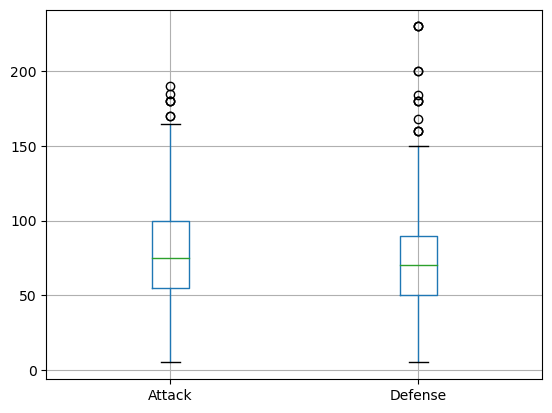

In [17]:
data.boxplot(column=['Attack','Defense'])
plt.show()

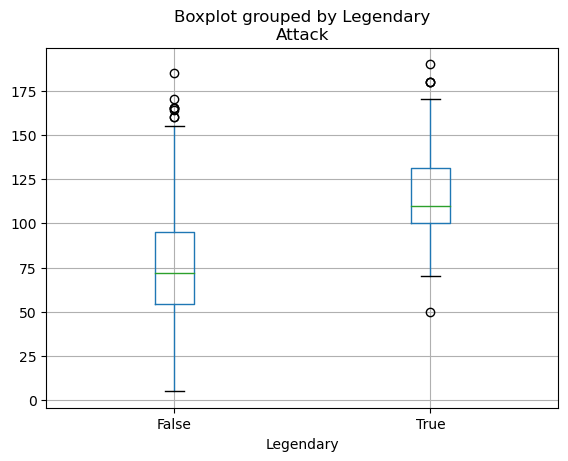

In [18]:
# 加入分类数据列‘Legendary’
data.boxplot(column='Attack',by='Legendary')
plt.show()

In [19]:
data.head(5)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [20]:
# 从pokemon数据中创建一组新的数据
data_new = data[10:15]    # 取10-14行共5行数据来构建新数据表
data_new

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
10,8,Wartortle,Water,NaN,405,59,63,80,65,80,58,1,False
11,9,Blastoise,Water,NaN,530,79,83,100,85,105,78,1,False
12,9,BlastoiseMega Blastoise,Water,NaN,630,79,103,120,135,115,78,1,False
13,10,Caterpie,Bug,NaN,195,45,30,35,20,20,45,1,False
14,11,Metapod,Bug,NaN,205,50,20,55,25,25,30,1,False


In [ ]:
### 重塑数据
我们使用melt()函数来转换数据的行列。

参数：

pandas.melt(frame, id_vars=None, value_vars=None, var_name=None, value_name='value', col_level=None)
- frame:要处理的数据集。
- id_vars:不需要被转换的列名。
- value_vars:需要转换的列名，如果剩下的列全部都要转换，就不用写了。
- var_name和value_name是自定义设置对应的列名。
我们直接看下面的示例来理解melt()。

In [21]:
pd.melt(frame=data_new, id_vars='Name', value_vars=['Attack','Defense'])

,Name,variable,value
0,Wartortle,Attack,63
1,Blastoise,Attack,83
2,BlastoiseMega Blastoise,Attack,103
3,Caterpie,Attack,30
4,Metapod,Attack,20
5,Wartortle,Defense,80
6,Blastoise,Defense,100
7,BlastoiseMega Blastoise,Defense,120
8,Caterpie,Defense,35
9,Metapod,Defense,55


### 数据连接

In [22]:
# 首先生成两个新的dataframe
data1 = data.head(3)
data2= data.tail(3)
# 使用comcat()函数将两个表拼接在一起
conc_data_row = pd.concat([data1, data2], axis = 0, ignore_index =True) # axis = 0 : 行拼接，即纵向拼接
conc_data_row

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
4,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True
5,721,Volcanion,Fire,Water,600,80,110,120,130,90,70,6,True


In [23]:
data1 = data['Attack'].head(3)
data2= data['Defense'].head(3)
conc_data_col = pd.concat([data1, data2], axis = 1)
conc_data_col

,Attack,Defense
0,49,49
1,62,63
2,82,83


### 数据类型转换
Python3基础数据类型：

Number（数字）:int、float、bool、complex
- String（字符串）
- List（列表）
- Tuple（元组）
- Set（集合）
- Dictionary（字典）
不同的数据类型间可以转换，例如将字符串转换为categorical数据（分类数据），或者将整数转换为浮点数。

统计数据类型:Numerical 与 Categorical

- Numerical data：这种数据类型具有实际测量的物理意义（例如一个人的身高、体重、血压等）；或者是一个计量数字（比如一个人拥有多少股票，一只猫有多少颗牙齿等），统计学上也称其为定量数据（quantitative data）。Numerical data可分为两类：
    - 离散型数据（discrete data）和连续型数据（continuous data）。
    离散型：离散数据无法测量但可以计数，具有可以列出的可能值。其可能值的列表可以是有限的，也可以是可数无穷的。例如，100次抛掷中正面的次数取值范围从0到100(有限情况)，但得到100次正面所需的抛掷次数取值范围从100(最快的情况)到无穷大(如果永远不能得到第100次正面)。它的可能值被列出为100、101、102、103、……(表示可数无穷情况)
    - 连续型：连续数据表示测量值，它们的可能值不能计算，只能用实数轴上的间隔来描述。例如，一个油箱容量60L的汽车，在加油站购买的确切汽油量将是0L到60L之间的连续数据，用区间[0,60]表示。你可能会购买的汽油量是30L、30.4L、30.414863L，或者从0到60的任何可能的数字。因此，连续数据可以被认为是不可数的无限的。为了便于记录，统计人员通常会在数字中选取一个点进行四舍五入。另一个例子是，某电池的寿命可能在0小时到无限小时之间(如果它永久存在)，从技术上讲，所有可能的值都在0小时到无限小时之间。当然，你不指望电池能持续数百小时以上，但没人能给电池的续航时间设定上限。
    
    
Categorical data：分类数据表示特征，如一个人的性别，婚姻状况，家乡，或他们喜欢的电影类型。分类数据也可以是数值(例如“1”表示男性，“2”表示女性)，但这些数字没有数学意义，比如你不能把它们加在一起。

In [25]:
data.dtypes

#              int64
Name          object
Type 1        object
Type 2        object
Total          int64
HP             int64
Attack         int64
Defense        int64
Sp. Atk        int64
Sp. Def        int64
Speed          int64
Generation     int64
Legendary       bool
dtype: object

In [26]:
data['Type 1'] = data['Type 1'].astype('category')
data.head(3)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False


In [27]:
data.dtypes

#                int64
Name            object
Type 1        category
Type 2          object
Total            int64
HP               int64
Attack           int64
Defense          int64
Sp. Atk          int64
Sp. Def          int64
Speed            int64
Generation       int64
Legendary         bool
dtype: object

In [29]:
data['Speed'] = data['Speed'].astype('float')

In [30]:
data.dtypes

#                int64
Name            object
Type 1        category
Type 2          object
Total            int64
HP               int64
Attack           int64
Defense          int64
Sp. Atk          int64
Sp. Def          int64
Speed          float64
Generation       int64
Legendary         bool
dtype: object

In [31]:
data.head(4)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45.0,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60.0,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80.0,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80.0,1,False


In [32]:
data['Type 2'].head(6)

0    Poison
1    Poison
2    Poison
3    Poison
4       NaN
5       NaN
Name: Type 2, dtype: object

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   #           800 non-null    int64   
 1   Name        800 non-null    object  
 2   Type 1      800 non-null    category
 3   Type 2      414 non-null    object  
 4   Total       800 non-null    int64   
 5   HP          800 non-null    int64   
 6   Attack      800 non-null    int64   
 7   Defense     800 non-null    int64   
 8   Sp. Atk     800 non-null    int64   
 9   Sp. Def     800 non-null    int64   
 10  Speed       800 non-null    float64 
 11  Generation  800 non-null    int64   
 12  Legendary   800 non-null    bool    
dtypes: bool(1), category(1), float64(1), int64(8), object(2)
memory usage: 71.1+ KB


In [34]:
data['Type 2'].value_counts(dropna =False)

NaN         386
Flying       97
Ground       35
Poison       34
Psychic      33
Fighting     26
Grass        25
Fairy        23
Steel        22
Dark         20
Dragon       18
Ice          14
Rock         14
Water        14
Ghost        14
Fire         12
Electric      6
Normal        4
Bug           3
Name: Type 2, dtype: int64

In [40]:
# 使用dropna()删除NaN值
data1=data   # 待会我们将使用数据来填充缺失的值，所以先将它分配给data1变量
data1["Type 2"].dropna(inplace = True)
# inplace = True表示我们不将其赋值给新变量,自动分配填充缺失值
# 可以看到原来的NaN值全部被随机填充上Flying、Dragon等属性
data1.dropna().head(6)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45.0,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60.0,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80.0,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80.0,1,False
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100.0,1,False
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100.0,1,False


In [43]:
data1.dropna()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45.0,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60.0,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80.0,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80.0,1,False
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100.0,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50.0,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110.0,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70.0,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80.0,6,True


In [44]:
data1.head(6)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45.0,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60.0,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80.0,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80.0,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65.0,1,False
5,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80.0,1,False


In [36]:
# 让我们看一下assert语句的用法
assert 1==1 
# 语句是真，所以什么都没有返回


In [37]:
# 为了不影响下面cell的运行，我们需要对此行进行注释
assert 1==2   
# 去掉‘#’运行一下，会发现返回的是AssertError错误

AssertionError: 

In [38]:
# 使用notnull()函数判断数据是否缺失，返回boll型数据，这里返回的是Ture
# 使用all()函数判断notnull()返回的值是否都为True，是则返回Ture
# 使用assert断言,语句为真
assert  data1['Type 2'].notnull().all() # 因为已经删除了nan值，所以什么也不返回


AssertionError: 

In [39]:
data1.head(30)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45.0,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60.0,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80.0,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80.0,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65.0,1,False
5,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80.0,1,False
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100.0,1,False
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100.0,1,False
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100.0,1,False
9,7,Squirtle,Water,NaN,314,44,48,65,50,64,43.0,1,False


In [42]:
data1['Type 2'].head(6)

0    Poison
1    Poison
2    Poison
3    Poison
4       NaN
5       NaN
Name: Type 2, dtype: object

In [45]:
# 使用fillna()可以填充缺失值
data["Type 2"].fillna('empty',inplace = True)

In [46]:
data.head(6)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45.0,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60.0,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80.0,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80.0,1,False
4,4,Charmander,Fire,empty,309,39,52,43,60,50,65.0,1,False
5,5,Charmeleon,Fire,empty,405,58,64,58,80,65,80.0,1,False


In [47]:
assert  data['Type 2'].notnull().all() # 因为无NaN值，所以没有返回值

In [49]:
# # 通过assert语句，我们可以检查很多东西。例如：
assert data.columns[1] == 'Name'


In [53]:
assert data.Speed.dtypes=='float64'

## Pandas进阶
内容回顾
在前面的章节中我们学习了pandas的基础知识：

- single column = series
- NaN = not a number
- dataframe.values = numpy
在本章，我们将进一步学习pandas的应用

构建dataframe
我们可以像前面那样从csv构建dataframe，也可以从dict中创建dataframe。

- 使用zip()函数
- 添加新列
- 广播（Broadcasting）: 创建新列并为整个列赋值


In [55]:
# 从字典中构建dataframe
country = ["Spain","France"]
population = ["11","12"]
list_label = ["country","population"]
list_col = [country,population]

In [59]:
# zip()函数的用法在第二章第7节
zipped = list(zip(list_label,list_col))
data_dict = dict(zipped)
df = pd.DataFrame(data_dict)
df

,country,population
0,Spain,11
1,France,12


In [60]:
# 添加新列
df["capital"] = ["madrid","paris"]
df

,country,population,capital
0,Spain,11,madrid
1,France,12,paris


In [61]:
# 广播（Broadcasting）
df["income"] = 0   # broadcasting整列
df

,country,population,capital,income
0,Spain,11,madrid,0
1,France,12,paris,0


### 可视化EDA
- 绘图
- 绘制子图
- 直方图（柱状图）:
    - bins: 指定直方图条形的个数
    - range(tuble): 指定直方图数据的上下界，默认包含绘图数据的最大值和最小值
    - normed(boolean): 是否将直方图的频数转换成频率
    - cumulative(boolean): 是否需要计算累计频数或频率

In [64]:
# 绘制所有数据
data1 = data.loc[:,["Attack","Defense","Speed"]]
data1.plot()
# 三个曲线混在一张图里看起来很乱

<Axes: >

<Axes: >

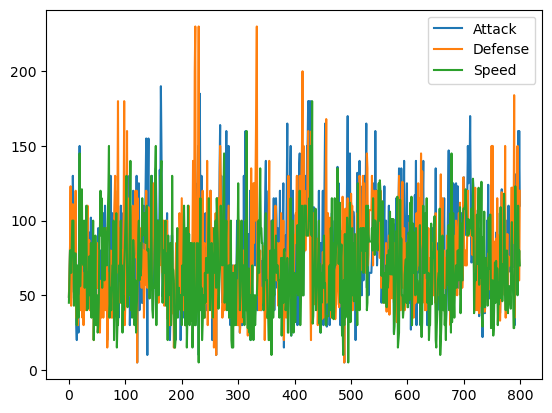

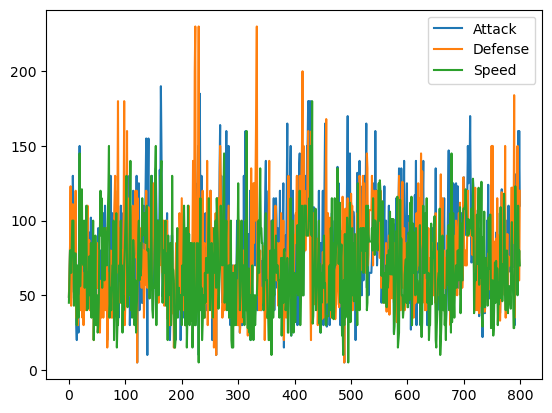

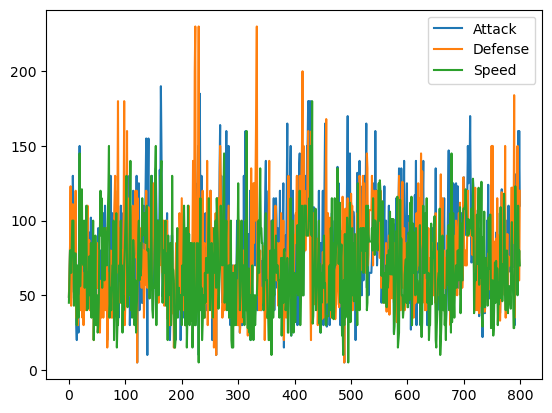

In [66]:
%matplotlib inline ## 必须添加这行命令
data1.plot()

array([<Axes: >, <Axes: >, <Axes: >], dtype=object)

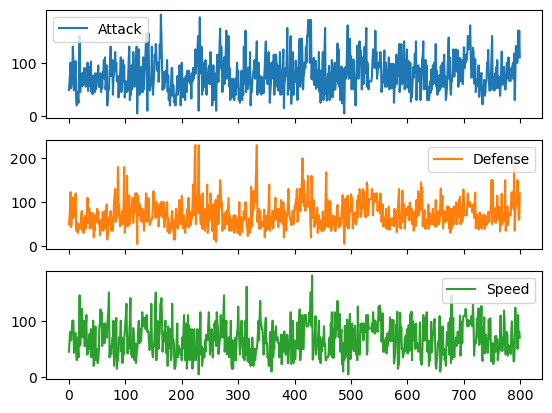

In [67]:
data1.plot(subplots = True)

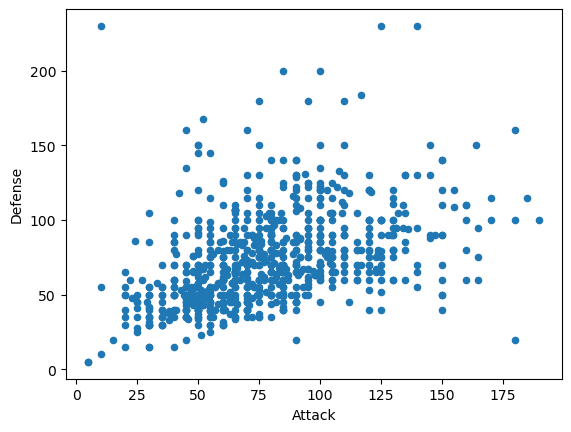

In [68]:
# 绘制散点图
data1.plot(kind = "scatter",x="Attack",y = "Defense")
plt.show()

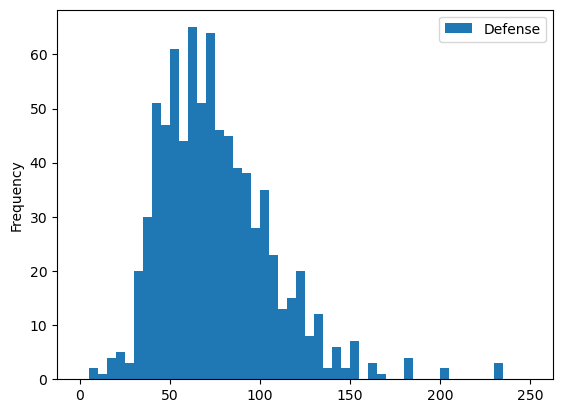

In [73]:
# 直方图  
from scipy.stats import norm # 必须加入依赖包

data1.plot(kind = "hist",y = "Defense",bins = 50,range= (0,250),density = False) # density 属性
plt.show()

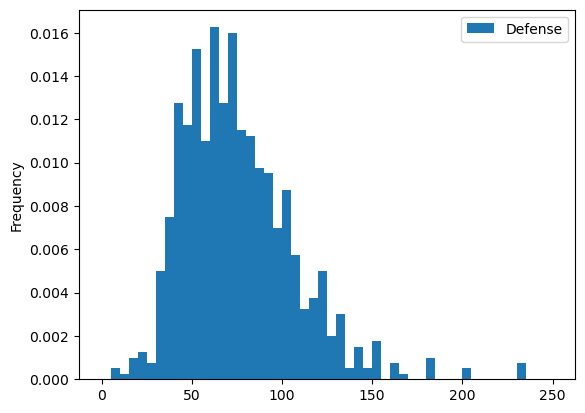

In [74]:
# 将直方图的频数转换成频率
data1.plot(kind = "hist",y = "Defense",bins = 50,range= (0,250),density = True)
plt.show()

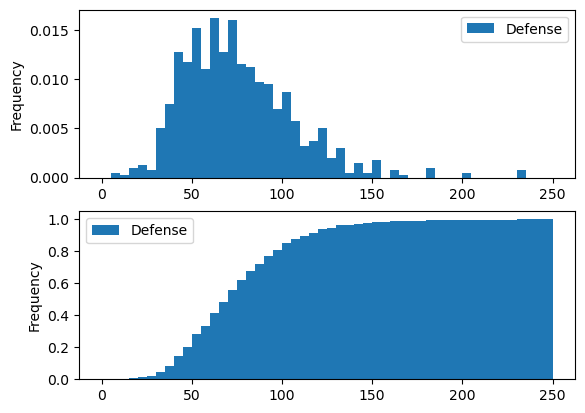

In [75]:
# 统计直方图
fig, axes = plt.subplots(nrows=2,ncols=1)
data1.plot(kind = "hist",y = "Defense",bins = 50,range= (0,250),density = True,ax = axes[0])
# 累计直方图
data1.plot(kind = "hist",y = "Defense",bins = 50,range= (0,250),density = True,ax = axes[1],cumulative = True)
plt.savefig('graph.png')
plt.show()

### describe() 函数
前面已经解释过了，让我们回顾一下它的运算指标：

- count: 计算每个条目出现的次数
- mean: 平均值
- std: 标准差
- min: 最小值
- 25%: 第一四分位数
- 50%: 中位数
- 75%: 第三四分位数
- max: 最大值

In [77]:
data.describe()

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,362.813750,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,208.343798,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.000000,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,184.750000,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,364.500000,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,539.250000,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,721.000000,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


### 时间序列处理
- datetime = object
- parse_dates(boolean): 将日期转换为 ISO8601 (yyyy-mm-dd hh:mm:ss ) 格式

In [79]:
time_list = ["1992-03-08","1992-04-12"]
print(type(time_list[1])) # 此时日期是str类型

<class 'str'>


In [80]:
# 我们希望能将它变为datatime类型
datetime_object = pd.to_datetime(time_list)
print(type(datetime_object))

<class 'pandas.core.indexes.datetimes.DatetimeIndex'>


In [83]:
data2 = data.head()
data2

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45.0,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60.0,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80.0,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80.0,1,False
4,4,Charmander,Fire,empty,309,39,52,43,60,50,65.0,1,False


In [85]:
# 调用filterwarnings()关闭警告消息
import warnings
warnings.filterwarnings("ignore")

date_list = ["1992-01-10","1992-02-10","1992-03-10","1993-03-15","1993-03-16"]
datetime_object = pd.to_datetime(date_list)
data2["date"] = datetime_object

# 设置日期作为索引
data2= data2.set_index("date")
data2 

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
date,,,,,,,,,,,,,
1992-01-10,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45.0,1,False
1992-02-10,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60.0,1,False
1992-03-10,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80.0,1,False
1993-03-15,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80.0,1,False
1993-03-16,4,Charmander,Fire,empty,309,39,52,43,60,50,65.0,1,False


In [86]:
# 现在可以根据日期索引筛选数据
# 因为日期字段已经设置为 index
print(data2.loc["1993-03-16"])

#                      4
Name          Charmander
Type 1              Fire
Type 2             empty
Total                309
HP                    39
Attack                52
Defense               43
Sp. Atk               60
Sp. Def               50
Speed               65.0
Generation             1
Legendary          False
Name: 1993-03-16 00:00:00, dtype: object


### 时间序列重采样
Pandas提供了便捷的方式对时间序列进行重采样（resampling），根据时间粒度的变大或者变小分为降采样和升采样：

- 降采样（Downsampling）: 时间粒度变大。例如，原来是按天统计的数据，现在变成按周统计。
- 升采样（Upsampling）: 时间粒度变小。例如，原来是按周统计的数据，现在变成按天统计。
- 插值(Interpolate): 根据“linear”、“time”或“index”等不同方法插值。

https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.interpolate.html

In [89]:
data2.head(100)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
date,,,,,,,,,,,,,
1992-01-10,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45.0,1,False
1992-02-10,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60.0,1,False
1992-03-10,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80.0,1,False
1993-03-15,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80.0,1,False
1993-03-16,4,Charmander,Fire,empty,309,39,52,43,60,50,65.0,1,False


In [91]:
# 按年进行重采样

data2.resample("Y").mean()

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
date,,,,,,,,,,
1992-12-31,2.0,416.0,61.666667,64.333333,65.0,81.666667,81.666667,61.666667,1.0,0.0
1993-12-31,3.5,467.0,59.500000,76.000000,83.0,91.000000,85.000000,72.500000,1.0,0.0


In [92]:
# 按月进行重采样
data2.resample("M").mean()
# 可以看到有很多NaN值，因为data2中不包括所有月份

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
date,,,,,,,,,,
1992-01-31,1.0,318.0,45.0,49.0,49.0,65.0,65.0,45.0,1.0,0.0
1992-02-29,2.0,405.0,60.0,62.0,63.0,80.0,80.0,60.0,1.0,0.0
1992-03-31,3.0,525.0,80.0,82.0,83.0,100.0,100.0,80.0,1.0,0.0
1992-04-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1992-05-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1992-06-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1992-07-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1992-08-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1992-09-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [94]:
# 在真实数据场景中，我们可以使用interplolate()
# 从初值开始插值
# 当前版本执行有问题，可暂时忽略
# data2.resample("M").first().interpolate("linear")

In [1]:
import torch